In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/slava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
positive_words = ["happy", "excited", "awersome"]
negative_words = ["disappointed", "frustrated", "terrible"]

In [3]:
def get_sentiment(text):
    words = nltk.word_tokenize(text.lower())
    num_positive = sum([1 for word in words if word in positive_words])
    num_negative = sum([1 for word in words if word in negative_words])
    if num_positive > num_negative:
        return "positive"
    elif num_negative > num_positive:
        return "negative"
    else:
        return "neutral"

In [4]:
text1 =  "I am so happy today"
text2 = "I am so frustrated with this service"
text3 = "The movie was okeya, I guess."
print(get_sentiment(text1))
print(get_sentiment(text2))
print(get_sentiment(text3))

positive
negative
neutral


In [5]:
tweets = pd.read_csv("tweets.csv")

In [6]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [7]:
from textblob import TextBlob

In [8]:
def get_sentiment(tweet):
    blob =  TextBlob(tweet)
    return blob.sentiment.polarity

In [9]:
tweets["sentiment"] = tweets["text"].apply(get_sentiment) # apply the function to each row of the column

In [10]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00


In [11]:
def get_sentimnent_label(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [12]:
tweets["sentiment_label"] = tweets["sentiment"].apply(get_sentimnent_label)

In [13]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment,sentiment_label
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50,negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00,neutral
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05,negative
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00,neutral


In [14]:
def get_category(value):
    if value > 100_000:
        return "high"
    elif value < 5_000:
        return "low"
    else:
        return "medium"

In [15]:
tweets["follow_category"] = tweets["user_followers"].apply(get_category)

In [16]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment,sentiment_label,follow_category
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,neutral,low
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50,negative,low
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00,neutral,low
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05,negative,medium
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00,neutral,low


<Axes: >

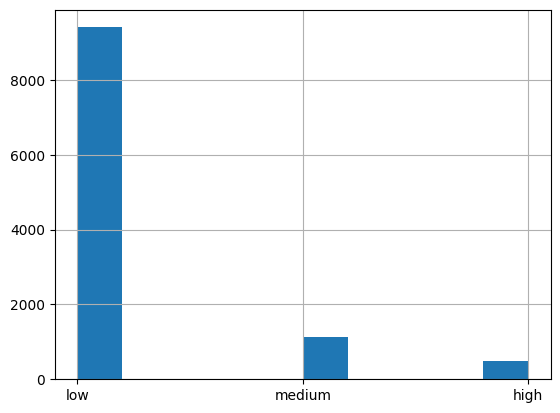

In [17]:
tweets["follow_category"].hist()

## Разметка данных с использованием активного обучения

Human-in-the-loop (HITL)

kaggle: https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/input

original: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [19]:
reviews = pd.read_csv("train.csv", engine="python")

In [20]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [21]:
reviews["sentiment"] = reviews["sentiment"].replace({"positive": 1, "negative": 0})

/tmp/ipykernel_6862/2508281129.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reviews["sentiment"] = reviews["sentiment"].replace({"positive": 1, "negative": 0})


In [22]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


<Axes: >

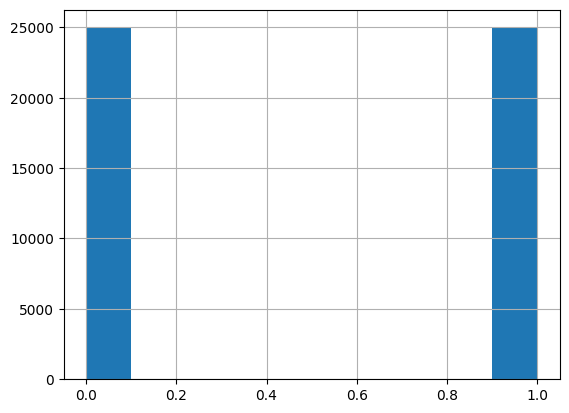

In [23]:
reviews["sentiment"].hist()

In [24]:
reviews = shuffle(reviews)

In [25]:
labeled_reviews, unlabeled_reviews = train_test_split(reviews, test_size=0.2, random_state=42)

In [26]:
labeled_reviews.head()

,review,sentiment
46402,What ever possessed Martin Scorcese to remake ...,0
26149,This is one of Stan Laurel's best solo comedy'...,1
11118,"Well, I had seen ""They all laughed"" when it ca...",1
19218,"In the first Howling, we are introduced to a w...",0
42401,"The weakest of the 'old' crew Star Trek films,...",0


In [27]:
unlabeled_reviews.head()

,review,sentiment
23991,In reality that happened: the royal mother in ...,0
3996,He pulled the guys guts out his butt! That's a...,0
12700,"Typical Steven Seagal fare: that is, it's crap...",0
45279,I'm not sure what dragged me into the cinema t...,0
5572,Anyone familiar with horror films knows that m...,1


In [28]:
def train_model(labeled_reviews):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_reviews["review"])
    y = labeled_reviews["sentiment"]
    model = LogisticRegression()
    model.fit(X, y)
    return model, vectorizer

In [29]:
model, vectorizer = train_model(labeled_reviews)

In [30]:
x_unlabeled = vectorizer.transform(unlabeled_reviews["review"])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [31]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [32]:
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [33]:
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [34]:
model, vectoizer = train_model(labeled_reviews)

In [35]:
reviews_test = pd.read_csv("movie.csv", engine="python", header=None, names=["review", "sentiment"], skiprows=1)

In [36]:
reviews_test.head()

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [37]:
x_test = vectoizer.transform(reviews_test["review"])
y_test_predicted = model.predict(x_test)
f1 = f1_score(reviews_test["sentiment"], y_test_predicted)

In [38]:
f1

0.9258909957311625